# Finans Projekt 1 - English
This notebook is for assistance with the coding for many of the questions in the project.
The sections are marked with the corresponding question in the Project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions

#### Initialize python packages

In [90]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Read Data

In [91]:
# path to project data (replace with your own path)
file_path = r'C:\Users\artur\IdeaProjects\statistics\Introduction-to-Statistics\finans1\finans1_data.csv'

## Read data into a pandas DataFrame
D = pd.read_csv(file_path, delimiter=";")
## Keep only the dates and the ETFs AGG, VAW, IWN, and SPY
D = D.loc[:, ["t", "AGG", "VAW", "IWN", "SPY"]]

#### a) Simple summary of data

In [92]:
print(f"Dimension of DataFrame: {D.shape}") # f-strings allow us to insert variables directly into the string
print(f"Variable names: {D.columns}")
print("\nFirst few rows of DataFrame:") # \n is the newline character for strings
display(D.head())
print("Last row of DataFrame:")
display(D.tail())
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)

Dimension of DataFrame: (454, 5)
Variable names: Index(['t', 'AGG', 'VAW', 'IWN', 'SPY'], dtype='object')

First few rows of DataFrame:


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815


Last row of DataFrame:


,t,AGG,VAW,IWN,SPY
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394
453,2015-5-8,-0.000453,0.004074,0.002566,0.004271


Some summary statistics:


,AGG,VAW,IWN,SPY
count,454.000000,454.000000,454.000000,454.000000
mean,0.000266,0.001794,0.001188,0.001360
std,0.005976,0.036083,0.032015,0.024786
min,-0.029604,-0.203660,-0.179655,-0.137598
25%,-0.002973,-0.016096,-0.014305,-0.011325
50%,0.000237,0.004798,0.003120,0.004216
75%,0.003893,0.019685,0.019056,0.014498
max,0.030507,0.142977,0.126702,0.083276


Data types: t       object
AGG    float64
VAW    float64
IWN    float64
SPY    float64
dtype: object


In the dataset are included 4 ETFs variables AGG;VAW;IWN;SPY;dtype
Variables are quantitative
dtype is categorized as date variable
There are 8 observations variables: count, mean, std min, Q1, Q2, Q3, max. Each of them has 454 observational units.
Time periods: first: 2006-5-5	, last: 2015-5-8
Nothing is missing in the summary.

#### b) Histogram (empirical density)

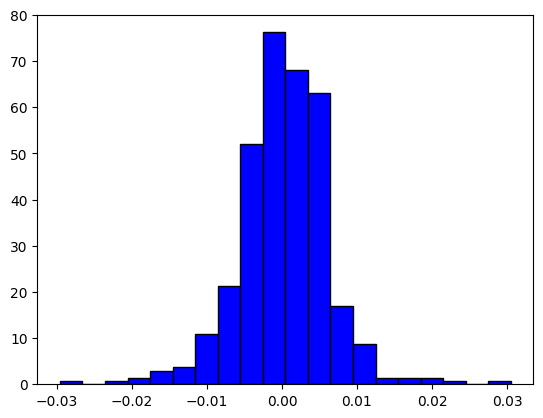

In [93]:
## Histogram describing the empirical density of the weekly returns from
## AGG (histogram of weekly returns normalized to have an area of 1)
plt.hist(D['AGG'].dropna(), bins=20, density=True, color='blue', edgecolor='black') # dropna() removes potential missing values
plt.show()

The empirical distribution is symmetrical, because average estimate of the parameter lays around the true parameter value=0.0, as we can see the estimated mean, which can be read in CLT theorem, where most of the data is accumulated in the centre.
Yes, returns can be both positive and negative, based on the graph. description.
There is not much variation based on the average estimate being primarly in the confidence interaval [-0.01;0.01].

#### Date variable t

In [94]:
# Converts the variable 't' to a date variable
D['t'] = pd.to_datetime(D['t']) 
# to_datetime() method converts string to a datetime pandas object. 
# This is necesary to make it ordinal
display(D['t'].describe())

count                              454
mean     2010-11-05 08:37:00.264317184
min                2006-05-05 00:00:00
25%                2008-08-05 18:00:00
50%                2010-11-04 12:00:00
75%                2013-02-06 06:00:00
max                2015-05-08 00:00:00
Name: t, dtype: object

#### c) Plots of data over time 

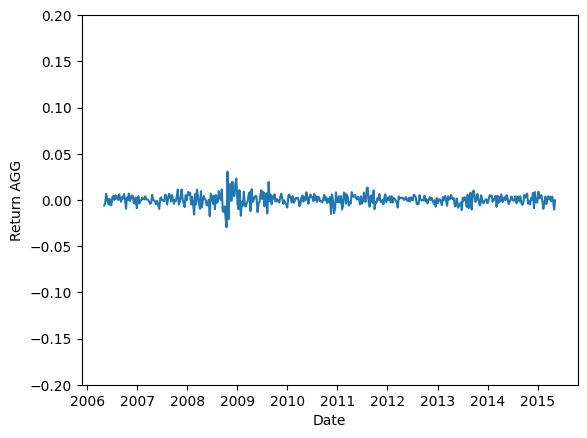

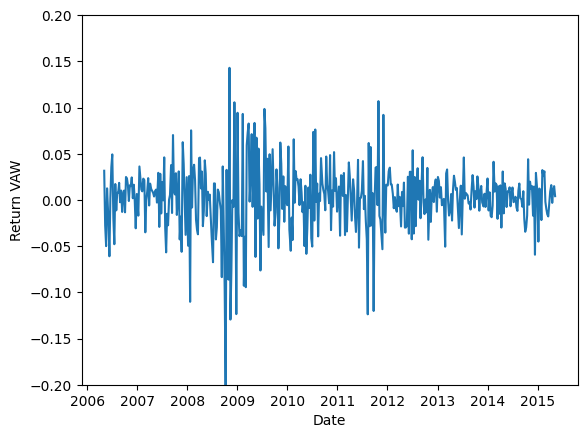

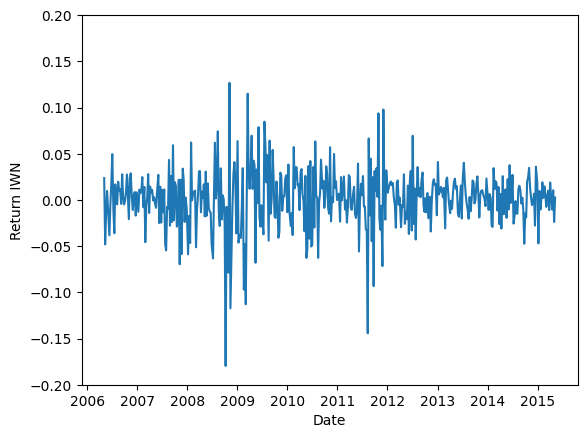

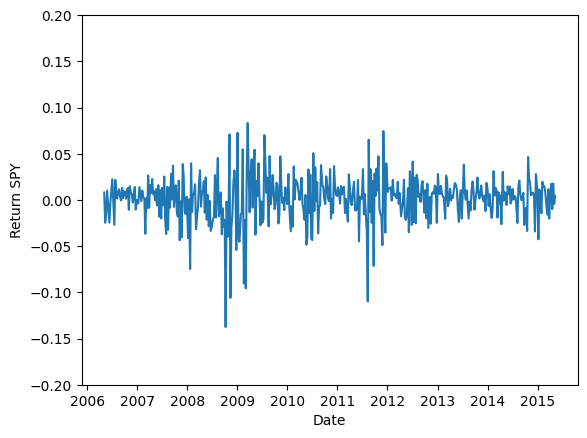

In [95]:
## Plot of weekly return over time for AGG
ylim = (-0.2, 0.2)
plt.plot(D['t'], D['AGG'], label='AGG')
plt.ylim(ylim)
plt.xlabel("Date")
plt.ylabel("Return AGG")
plt.show()
## Similar plots for the three other ETFs
for etf in ['VAW', 'IWN', 'SPY']:
    plt.plot(D['t'], D[etf], label=etf)
    plt.ylim(ylim)
    plt.xlabel("Date")
    plt.ylabel(f"Return {etf}")
    plt.show()

The development of the weekly returns is proned to change over time, especially in 2008-2009 around the global financial crisis, but also in 2011-2012. AGG is the most stable of the four ETF's, which is notably seen based on supply/demand in weekly return value over time. IWN and VAW are especially more volatile around the volatile periods, where we can see jumps from -0.20 to +0.15 in VAW and bit less but close in the same interval for IWN. These volatile weekly returns signifies the overall returns. SPY is similarly volatile in the same periods from around -0.15 to +0.10, altough not quite as VAW. Regarding the density, from the histograms we can see that VAW is heavily traded in comparison to others in the period around start-middle of 2009.







#### d) Box plots by ETF

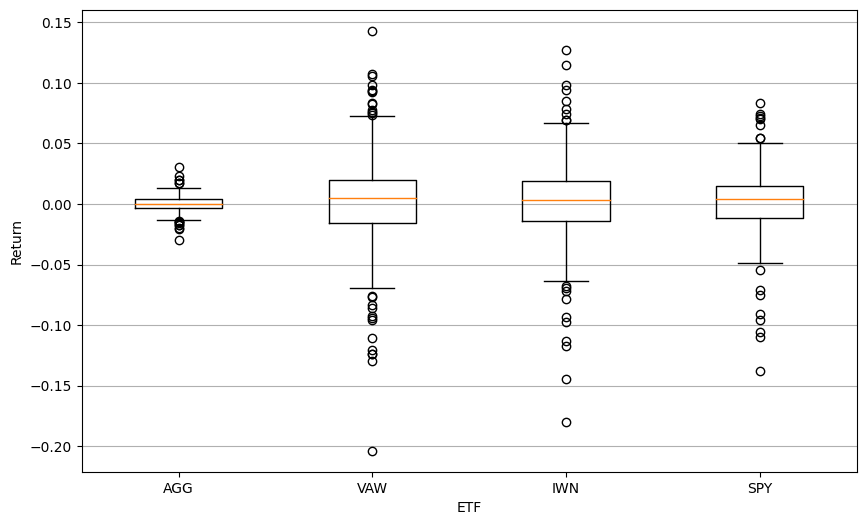

In [96]:
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

plt.figure(figsize=(10, 6))
plt.boxplot([D['AGG'],D['VAW'],D['IWN'],D['SPY']], labels=etfs)
plt.xlabel("ETF")
plt.ylabel("Return")
plt.grid(axis='y')
plt.show()

The empirical distributions are symmetrical based on the boxsplots median and mean being quite close to each other and the parameter value 0.0.

There are differences between all ETFs, primarly based on volatility. VAW has outliers mostly in the range from -0.08 to -0.13, with couple in 0.15 and -0.20.

In comparison IWN has mostly outliers spread out from -0.18 to 0.13 where there is quite a skewed distribution in the positive outliers in comparison to the negative ones, while VAW is consistent in both the positive and negative weekly return values.

Lastly SPY has outliers in smaller ranges from -0.14 to 0.09, where positive outliers are denstly stacked together in comparison to the negative ones. This summarizes overall extreme observations noted in all 4 ETF's, which could be explaiend by diversified portfolios and changes in supply/demand.


The distributions are symmetrical.
There is a difference between the distributions
There are extreme observations/outliers, which can be seen through all ETF's however more extreme volatilty can be seen in VAW and IWN, where outliers are more spread out in both negative and positive spectrum.

#### e) Key summary statistics for AGG, VAW, IWN, SPY

### Key summary statistics for AGG

In [97]:
print(f"Total number of observations (without missing values): {D['AGG'].notna().sum()}")
print(f"Sample mean of weekly returns: {np.mean(D['AGG'])}")
print(f"Sample variance of weekly returns: {np.var(D['AGG'], ddof=1)}") # ddof=1 as we want the *sample* variance
print(f"Standard deviation of weekly returns: {np.std(D['AGG'],ddof=1)}")
print(f"Lower quantile: {np.percentile(D['AGG'], 0.25)}")
print(f"Media quantile: {np.percentile(D['AGG'], 0.50)}")
print(f"Upper quantile: {np.percentile(D['AGG'], 0.75)}")

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.00026575697622256976
Sample variance of weekly returns: 3.5710678035142804e-05
Standard deviation of weekly returns: 0.005975841198956245
Lower quantile: -0.02088920587550794
Media quantile: -0.019432353984808335
Upper quantile: -0.017450053089759


### Key summary statistics for VAW

In [98]:
print(f"Total number of observations (without missing values): {D['VAW'].notna().sum()}")
print(f"Sample mean of weekly returns: {np.mean(D['VAW'])}")
print(f"Sample variance of weekly returns: {np.var(D['VAW'], ddof=1)}") # ddof=1 as we want the *sample* variance
print(f"Standard deviation of weekly returns: {np.std(D['VAW'],ddof=1)}")
print(f"Lower quantile: {np.percentile(D['VAW'], 0.25)}")
print(f"Media quantile: {np.percentile(D['VAW'], 0.50)}")
print(f"Upper quantile: {np.percentile(D['VAW'], 0.75)}")

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.001793790119444702
Sample variance of weekly returns: 0.001301973052671574
Standard deviation of weekly returns: 0.036082863698320485
Lower quantile: -0.12873349110239313
Media quantile: -0.12373959288804467
Upper quantile: -0.12222504810477194


### Key summary statistics for IWN

In [99]:
print(f"Total number of observations (without missing values): {D['IWN'].notna().sum()}")
print(f"Sample mean of weekly returns: {np.mean(D['IWN'])}")
print(f"Sample variance of weekly returns: {np.var(D['IWN'], ddof=1)}") # ddof=1 as we want the *sample* variance
print(f"Standard deviation of weekly returns: {np.std(D['IWN'],ddof=1)}")
print(f"Lower quantile: {np.percentile(D['IWN'], 0.25)}")
print(f"Media quantile: {np.percentile(D['IWN'], 0.50)}")
print(f"Upper quantile: {np.percentile(D['IWN'], 0.75)}")

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.0011876792478567023
Sample variance of weekly returns: 0.0010249901098059928
Standard deviation of weekly returns: 0.03201546672791126
Lower quantile: -0.14075182858816804
Media quantile: -0.11611916091204835
Upper quantile: -0.10658292582776493


### Key summary statistics for SPY

In [100]:
print(f"Total number of observations (without missing values): {D['SPY'].notna().sum()}")
print(f"Sample mean of weekly returns: {np.mean(D['SPY'])}")
print(f"Sample variance of weekly returns: {np.var(D['SPY'], ddof=1)}") # ddof=1 as we want the *sample* variance
print(f"Standard deviation of weekly returns: {np.std(D['SPY'],ddof=1)}")
print(f"Lower quantile: {np.percentile(D['SPY'], 0.25)}")
print(f"Media quantile: {np.percentile(D['SPY'], 0.50)}")
print(f"Upper quantile: {np.percentile(D['SPY'], 0.75)}")

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.0013601054498460002
Sample variance of weekly returns: 0.0006143462925621239
Standard deviation of weekly returns: 0.02478601001698587
Lower quantile: -0.10930665718142941
Media quantile: -0.10322863257289418
Upper quantile: -0.09358375680965342


| ETF | Number of obs.<br>($n$) | Sample mean<br>($\bar{x}$) | Sample variance<br>($s^2$) | Std. dev.<br>($s$) | Lower quartile<br>($Q_1$)| Median<br><br>($Q_2$) | Upper quartile<br>($Q_3$) |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|AGG| $454$ | $0.000266$ | $3.571068^{-05}$ | $0.005976$ | $-0.002973$ | $0.000237$ | $0.003893$ |
|VAW| $454$ | $0.001794$ | $0.001302$ | $0.036083$ | $-0.016096$ | $0.004798$ | $0.019685$ |
|IWN| $454$ | $0.001188$ | $0.001025$ | $0.032015$ | $-0.014305$ | $0.003120$ | $0.019056$ |
|SPY| $454$ | $0.001360$ | $0.000614$ | $0.024786$ | $-0.011325$ | $0.004216$ | $0.014498$ |

From the table can we find additional information about
1. number of observations
2. standard deviation
3. Variance

#### f) QQ-plot for model validation

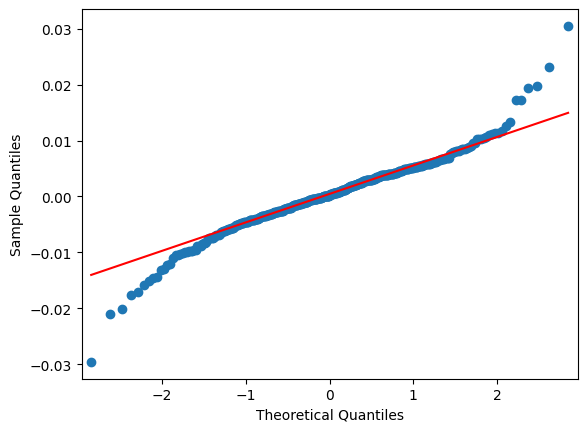

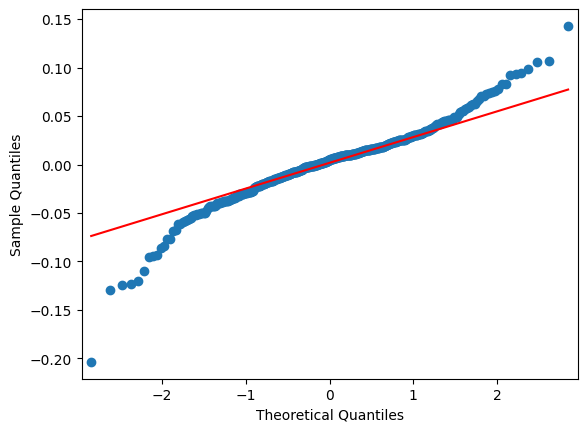

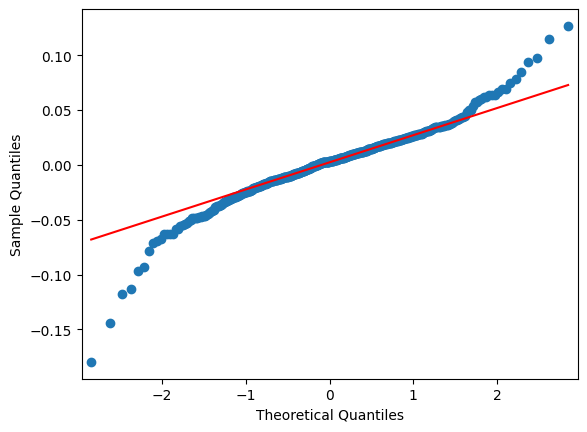

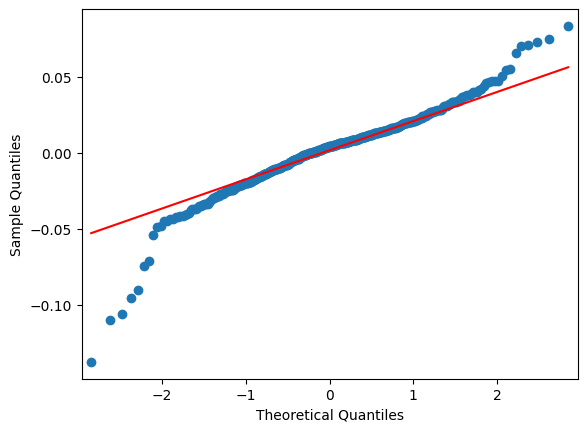

In [101]:
# QQ-plot for AGG's weekly returns
sm.qqplot(D['AGG'].dropna(), line ='q')
plt.show()
# QQ-plot for VAW's weekly returns
sm.qqplot(D['VAW'].dropna(), line ='q')
plt.show()
# QQ-plot for IWN's weekly returns
sm.qqplot(D['IWN'].dropna(), line ='q')
plt.show()
# QQ-plot for SPY's weekly returns
sm.qqplot(D['SPY'].dropna(), line ='q')
plt.show()

Central Limit Theorem(CLT) 3.14
AGG
VAW
IWN
SPY


#### g-h) One-sample t-test

In [102]:
# Test hypothesis mu = 0 for AGG's weekly returns
res = stats.ttest_1samp(D['AGG'], popmean=0)
print(f"Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

# Confidence interval
print(res.confidence_interval())


Test statistic: 0.9475749082082546
P-value: 0.3438511026649561
ConfidenceInterval(low=-0.00028540734518444, high=0.0008169212976295796)


In [103]:
#Computation of Confidence intervals (CI) for AGG, VAW, IWN, SPY
X_agg = np.mean(D['AGG']) # X of sample mean for AGG
N_agg = D['AGG'].notna().sum() # N of observations in AGG
S_agg = np.std(D['AGG'], ddof=1) # S of sample standard deviation of AGG
T_val_agg = stats.t.ppf(0.975, df=N_agg-1) # t-value for 95% confidence interval
CI_agg_low = X_agg - T_val_agg * (S_agg / np.sqrt(N_agg)) #lower bound
CI_agg_up = X_agg + T_val_agg * (S_agg / np.sqrt(N_agg)) #Upper bound
print(f"95% CI for AGG: ({CI_agg_low}, {CI_agg_up})")

#VAW
X_vaw = np.mean(D['VAW']) # sample mean of VAW
N_vaw = D['VAW'].notna().sum() # number of observations in VAW
S_vaw = np.std(D['VAW'], ddof=1) # sample standard deviation of VAW
T_val_vaw = stats.t.ppf(0.975, df=N_vaw-1) # t-value for 95% confidence interval
CI_vaw_low = X_vaw - T_val_vaw * (S_vaw / np.sqrt(N_vaw)) #lower bound
CI_vaw_up = X_vaw + T_val_vaw * (S_vaw / np.sqrt(N_vaw)) #upper bound
print(f"95% CI for VAW: ({CI_vaw_low}, {CI_vaw_up})")

#IWN
X_iwn = np.mean(D['IWN']) # sample mean of IWN
N_iwn = D['IWN'].notna().sum() # number of observations in IWN
S_iwn = np.std(D['IWN'], ddof=1) # sample standard deviation of IWN
T_val_iwn = stats.t.ppf(0.975, df=N_iwn-1) # t-value for 95% confidence interval
CI_iwn_low = X_iwn - T_val_iwn * (S_iwn / np.sqrt(N_iwn)) #lower bound
CI_iwn_up = X_iwn + T_val_iwn * (S_iwn / np.sqrt(N_iwn)) #Upper bound
print(f"95% CI for IWN: ({CI_iwn_low}, {CI_iwn_up})")

#SPY
X_spy = np.mean(D['SPY']) # sample mean of SPY
N_spy = D['SPY'].notna().sum() # number of observations in SPY
S_spy = np.std(D['SPY'], ddof=1) # sample standard deviation of SPY
T_value_spy = stats.t.ppf(0.975, df=n_SPY-1) # t-value for 95% confidence interval
CI_spy_low = X_spy - T_value_spy * (S_spy / np.sqrt(N_spy)) #lower bound
CI_spy_up = X_spy + T_value_spy * (S_spy / np.sqrt(N_spy)) #Upper bound
print(f"95% CI for SPY: ({CI_spy_low}, {CI_spy_up})")

95% CI for AGG: (-0.00028540734518444, 0.0008169212976295796)
95% CI for VAW: (-0.0015342078012798403, 0.005121788040169244)
95% CI for IWN: (-0.0017651741507074973, 0.004140532646420902)
95% CI for SPY: (-0.0009259600489804174, 0.0036461709486724178)


| ETF | Lower bound of CI | Upper bound of CI |
|:---:|:---:|:---:|
|AGG|-0.000285|0.000817|
|VAW|-0.001534|0.005122|
|IWN|-0.001765|0.004141|
|SPY|-0.000926|0.003646|

Based on the data we computed we can confidently state that One sample t-test results are equal to the CI for AGG results computed above.

#### h) Hypothetis test

In [104]:
H0_MU_agg = 0
alpha = 0.05
# H1_mu_AGG != 0
t_obs = (X_agg - H0_MU_agg) / (S_agg / np.sqrt(N_agg))
print(t_obs)
p_value = 2 * (1 - stats.t.cdf(abs(t_obs), df=N_agg-1))
print(f"Test statistic: {t_obs}")
print(f"P-val: {p_value}")
print(f"95% CI for AGG: ({CI_agg_low}, {CI_agg_up})")
print(f"Is H0 rejected: {p_value < alpha}")

0.9475749082082546
Test statistic: 0.9475749082082546
P-val: 0.343851102664956
95% CI for AGG: (-0.00028540734518444, 0.0008169212976295796)
Is H0 rejected: False


This outcome shows that there are no statistically significant evidence that AGG’s mean weekly return is differ from zero. Thus it is not statistically better to invest rather than not doing it. The results of the hypothesis tests show that both methods give the same conclusion in regards to the values from the one-sample t-test.

Based on calculated significance test we can conclude that there is statistically significant effect, however given big data size sample, it doesn't mean much for practical situations matter.

#### i) Welch t-test

In [105]:
# Comaring the mean weekly returns of VAW and AGG
res = stats.ttest_ind(D['VAW'].dropna(), D['AGG'].dropna(), equal_var=False)
print(f"Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

Test statistic: 0.8901925966613312
P-value: 0.3738104498113183


Given the definition 3.28 Significant effect we can compute if the p-value is less than significant effect $/alpha$

In [106]:
t_obs_ = ((X_vaw - X_agg) -0)/ np.sqrt(S_agg**2/N_agg + S_vaw**2/N_vaw)
print(f"T stat: {t_obs_}")
p_value2 = 2 * (1 - stats.t.cdf(abs(t_obs_), df=N_agg-1))
print(f"P-val 2: {p_value2}")
v = (S_agg**2/N_agg + S_vaw**2/N_vaw)**2 / (((S_agg**2/N_agg)**2/(N_agg-1)) + ((S_vaw**2/N_vaw)**2/(N_vaw-1)))
print(f"Deg of freedom: {v}")
# Compute t_0.975 from t-distribution with df = v
print(stats.t.ppf(0.975, df=v))

# Compute the observed test statistic from the data
H0 = 0 # null hypothesis

# Finding Standard errors
sd_err_AGG = S_agg/np.sqrt(N_agg)
sd_err_VAW = S_vaw/np.sqrt(N_vaw)

vaw_agg_mean_diff = X_vaw - X_agg
vaw_agg_sd_diff = np.sqrt(sd_err_AGG**2 + sd_err_VAW**2)
tobs = (vaw_agg_mean_diff - H0) / vaw_agg_sd_diff

# Computation of P-value with in built func
print("In-built function CDF: ")
print(2*stats.t.cdf(-tobs, df=v))
# or
print(2*(1 - stats.t.cdf(tobs, df=v)))

T stat: 0.8901925966613312
P-val 2: 0.3738349928718563
Deg of freedom: 477.8311995760505
1.9649410336230315
In-built function CDF: 
0.37381044981131795
0.37381044981131795


#### j)

In [107]:
print(f"95% CI for AGG: {CI_agg_low}, {CI_agg_up}")
print(f"95% CI for VAW: {CI_vaw_low}, {CI_vaw_up}")

95% CI for AGG: -0.00028540734518444, 0.0008169212976295796
95% CI for VAW: -0.0015342078012798403, 0.005121788040169244


Based on remark 3.59 CI overlap and answer is defined as:
When two CIs DO overlap: We do not know from this what the conclusion
is (but then we can use the presented two-sample test method)

#### k) Correlation

In [108]:
# Computing the  correlation between selected ETFs
correlation_matrix = D[["AGG", "VAW", "IWN", "SPY"]].corr()
display(correlation_matrix)

,AGG,VAW,IWN,SPY
AGG,1.000000,-0.197568,-0.135262,-0.218716
VAW,-0.197568,1.000000,0.851641,0.886361
IWN,-0.135262,0.851641,1.000000,0.910097
SPY,-0.218716,0.886361,0.910097,1.000000


Cov(VAW,IWN): 0.0009838236571725453
Correlation via pandas built-in: 0.8516407352552663
Correlation via manual formula: 0.8516407352552664


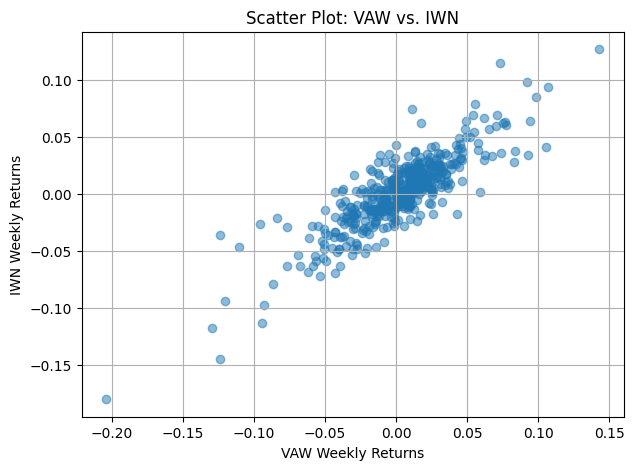

In [116]:
# 1) Extract the weekly returns for VAW and IWN
vaw = D["VAW"]
iwn = D["IWN"]

# 2) Compute the correlation with in-built func
corr_pandas = vaw.corr(iwn)

# 3) Manual calculation of covariance and standard deviations
covariance = np.cov(vaw, iwn, ddof=1)[0, 1]  # [0,1] extracts the off-diagonal element
std_vaw = vaw.std()  # Sample standard deviation
std_iwn = iwn.std()
corr_manual = covariance / (std_vaw * std_iwn)
print(f"Cov(VAW,IWN): {covariance}")
print("Correlation via pandas built-in:", corr_pandas)
print("Correlation via manual formula:", corr_manual)


# 4) Scatter plot for visual inspection
plt.figure(figsize=(7,5))
plt.scatter(vaw, iwn, alpha=0.5)
plt.xlabel("VAW Weekly Returns")
plt.ylabel("IWN Weekly Returns")
plt.title("Scatter Plot: VAW vs. IWN")
plt.grid(True)
plt.show()


## EXTRA
#### Subsets in Python

In [ ]:
## df['AGG'] < 0 returns all observations where AGG is negative
## Can be used to extract all AGG losses
loss_weeks = D['AGG'] < 0
agg_losses = D['AGG'][loss_weeks]
print("Weeks with negative returns in AGG:")
display(agg_losses)

## Alternatively, use the 'query' method
agg_losses_query = D.query('AGG < 0')
print("Weeks with negative returns in AGG (query method):")
display(agg_losses_query)
# Or use the 'loc' method
agg_losses_loc = D.loc[D['AGG'] < 0, 'AGG']
print("Weeks with negative returns in AGG (loc method):")
display(agg_losses_loc)

## More complex logical expressions can be made, e.g.:
## Find all observations from weeks where AGG had a loss and SPY had a gain
agg_loss_spy_gain = D.query('AGG < 0 & SPY > 0')
print("Weeks with negative AGG returns and positive SPY returns:")
display(agg_loss_spy_gain)

# "display()" function gives a nicer table than print. It is 
# especially useful when working with dataframes (pandas)

Weeks with negative returns in AGG:


0     -0.006088
1     -0.003675
4     -0.004775
6     -0.005812
7     -0.005744
         ...   
444   -0.004508
449   -0.001615
451   -0.001522
452   -0.010404
453   -0.000453
Name: AGG, Length: 214, dtype: float64

Weeks with negative returns in AGG (query method):


,t,AGG,VAW,IWN,SPY
0,2006-05-05,-0.006088,0.031573,0.023603,0.007987
1,2006-05-12,-0.003675,-0.027460,-0.048072,-0.024751
4,2006-06-05,-0.004775,-0.022321,-0.017734,-0.009815
6,2006-06-19,-0.005812,0.001998,-0.005530,-0.002581
7,2006-06-26,-0.005744,0.035400,0.017855,0.010674
...,...,...,...,...,...
444,2015-03-05,-0.004508,-0.009821,-0.007532,-0.004352
449,2015-04-10,-0.001615,0.016019,0.000193,0.017438
451,2015-04-24,-0.001522,0.011181,0.010418,0.017793
452,2015-05-01,-0.010404,0.014923,-0.023800,-0.004394


Weeks with negative returns in AGG (loc method):


0     -0.006088
1     -0.003675
4     -0.004775
6     -0.005812
7     -0.005744
         ...   
444   -0.004508
449   -0.001615
451   -0.001522
452   -0.010404
453   -0.000453
Name: AGG, Length: 214, dtype: float64

Weeks with negative AGG returns and positive SPY returns:


,t,AGG,VAW,IWN,SPY
0,2006-05-05,-0.006088,0.031573,0.023603,0.007987
7,2006-06-26,-0.005744,0.035400,0.017855,0.010674
14,2006-08-15,-0.000101,0.007605,0.019658,0.009575
22,2006-10-11,-0.009680,0.024822,0.008839,0.001408
24,2006-10-25,-0.000201,0.015830,0.004393,0.012885
...,...,...,...,...,...
441,2015-02-11,-0.009559,0.025773,0.002199,0.014064
442,2015-02-19,-0.003067,0.030951,0.014759,0.014739
449,2015-04-10,-0.001615,0.016019,0.000193,0.017438
451,2015-04-24,-0.001522,0.011181,0.010418,0.017793


#### Additional Python tips

In [ ]:
## Make a for loop to calculate some summary 
## statistics and save the result in a new data frame
Tbl = pd.DataFrame()
for i in ['AGG', 'VAW', 'IWN', 'SPY']:
    Tbl.loc[i, "ETF_mean"] = D[i].mean()
    Tbl.loc[i, "ETF_var"] = D[i].var(ddof=1) 
    
# show
display(Tbl)

,ETF_mean,ETF_var
AGG,0.000266,0.000036
VAW,0.001794,0.001302
IWN,0.001188,0.001025
SPY,0.001360,0.000614


In [ ]:
# There are many other ways to do these calculations, some more concise. For example
# Calculate mean and variance for all columns but 't'
result = D.drop(columns='t').agg(['mean', 'var'])
# The agg function(aggregate) is used to calculate the mean and variance of returns for each ETF.
display(result)

# See more functions in pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# Numpy documentationen: https://numpy.org/doc/stable/reference/index.html
# Or find documentation or guides on other python packages/functions online.

,AGG,VAW,IWN,SPY
mean,0.000266,0.001794,0.001188,0.001360
var,0.000036,0.001302,0.001025,0.000614


#### Latex Tips
Pandas (pd) also includes a function that is very handy for writing tables/dataframes directly into Latex-code. 
This is done by usind the function `pd.to_latex()`.
The following is the simplest form of the function:

In [ ]:
Tbl_latex = Tbl.to_latex()
print(Tbl_latex)

\begin{tabular}{lrr}
\toprule
 & ETF_mean & ETF_var \\
\midrule
AGG & 0.000266 & 0.000036 \\
VAW & 0.001794 & 0.001302 \\
IWN & 0.001188 & 0.001025 \\
SPY & 0.001360 & 0.000614 \\
\bottomrule
\end{tabular}

